<b>Problem Statement</b>: </br>
The data revolution has a lot to do with the fact that now we are able to collect all sorts of data about people who buy something on our site as well as people who don't. This gives us a tremendous opportunity to understand what's working well (and potentially scale it even further) and what's not working well (and fix it).

The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve revenue.

# Step#0: Import Library

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Step#1: Import Data

In [2]:
#import the data 
data = pd.read_csv("conversion_data.csv")

In [3]:
data.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [4]:
data.describe(include = "all")

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


<b>Observation:</b><br>
1) Most users are from US <br>
2) Most users are at young ages with the average around 30 years old, and there are outliers, for example, max age is 123 <br>
3) The Conversion rate is at 3.2% <br>


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


# Step#2: Visualize Data

<AxesSubplot:xlabel='age'>

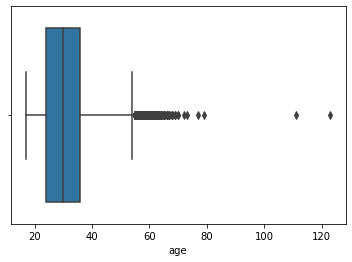

In [6]:
sns.boxplot(x = 'age', data= data)

In [7]:
#Delete the outlier in age
data = data[data['age']<=90]

<AxesSubplot:xlabel='converted', ylabel='count'>

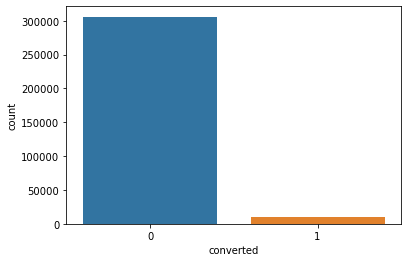

In [8]:
sns.countplot(x = 'converted', data = data)

The dataset is highly unbalanced

In [9]:
columns1 = ['country','new_user','source']

In [10]:
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


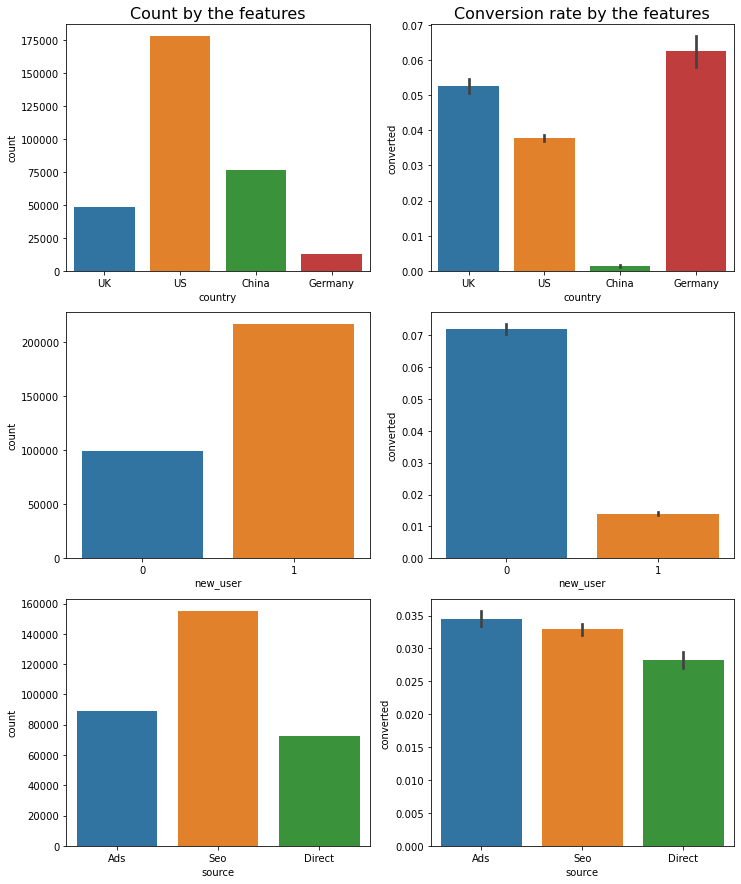

In [11]:
# Analyze the categorical data

fig, axes = plt.subplots(nrows = 3,ncols = 2, figsize = (10,12))
fig.tight_layout(h_pad = 2, w_pad= 3)
i  = 0

for column in columns1:
    sns.countplot(x = column, data = data, ax = axes[i,0])
    axes[0,0].set_title("Count by the features",fontsize = 16)
    sns.barplot(x = column, y = 'converted', data = data, ax = axes[i,1])
    axes[0,1].set_title("Conversion rate by the features", fontsize = 16)
    i += 1
    
#Country: {'UK':1,"US":2,"China":3,"Germany":4}
#New_user: {'New':1, 'Not New':0}
#Source: {'Ads':1,"Seo":2,"Direct":3}

<b>Obsearvations from the plots </b>
<ul>
    <li>
        <b>Country</b>: <br>Most of the customers are from US, followed by China, UK, and Germany.
            Among the countries, Germany has the highest converation rate, although it has the lowest customer number. China has a relatively high customer number, but it has the lowest conversion rate.
    </li> 
    <li>
        <b>New customers</b>: <br>Most of the customers are new customers. 
        But the conversion rate of existing customers is mucher higher than the rate of new customer.
    </li>
    <li>
        <b>Source</b>: <br>Seo is the main source that attracts customers to the website, followed by Ads and Direct.
        Ads has a relatively high conversion rate
    </li>
    
       


In [12]:
#Analyze the numeric data
columns2 = ['age','total_pages_visited']

Text(0, 0.5, 'cumulative conversion rate')

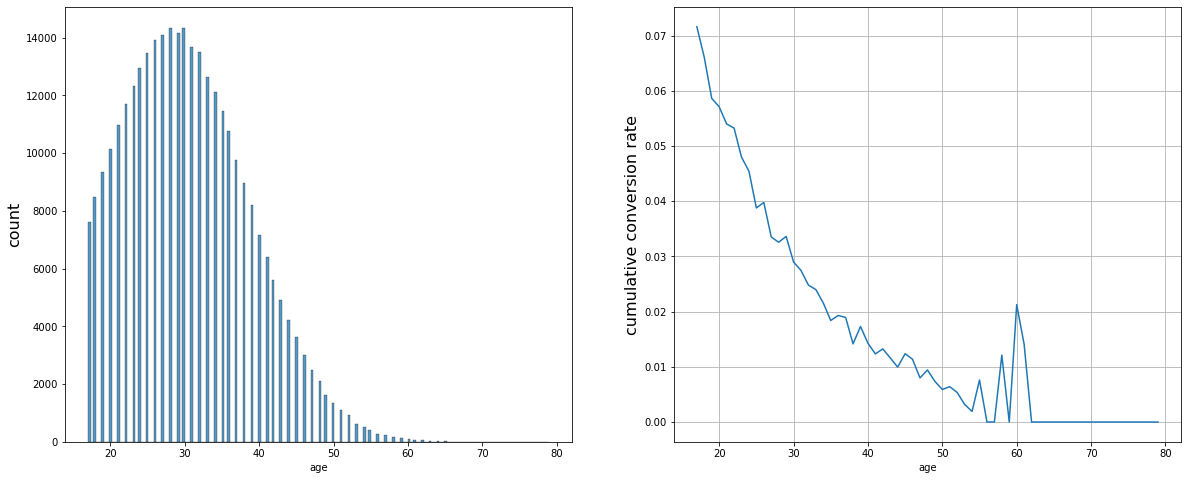

In [13]:
#Age
grouped = data[['age','converted']].groupby('age').mean().reset_index()

fig, axs = plt.subplots(1,2, figsize = (20,8))
sns.histplot(x = data['age'], ax= axs[0])
sns.lineplot(grouped['age'], grouped['converted'], ax = axs[1])
axs[1].set_ylabel('cumulative conversion rate')
axs[1].grid(True)
axs[0].set_ylabel('count',fontsize = 16)
axs[1].set_ylabel('cumulative conversion rate',fontsize = 16)

Text(0, 0.5, 'cumulative conversion rate')

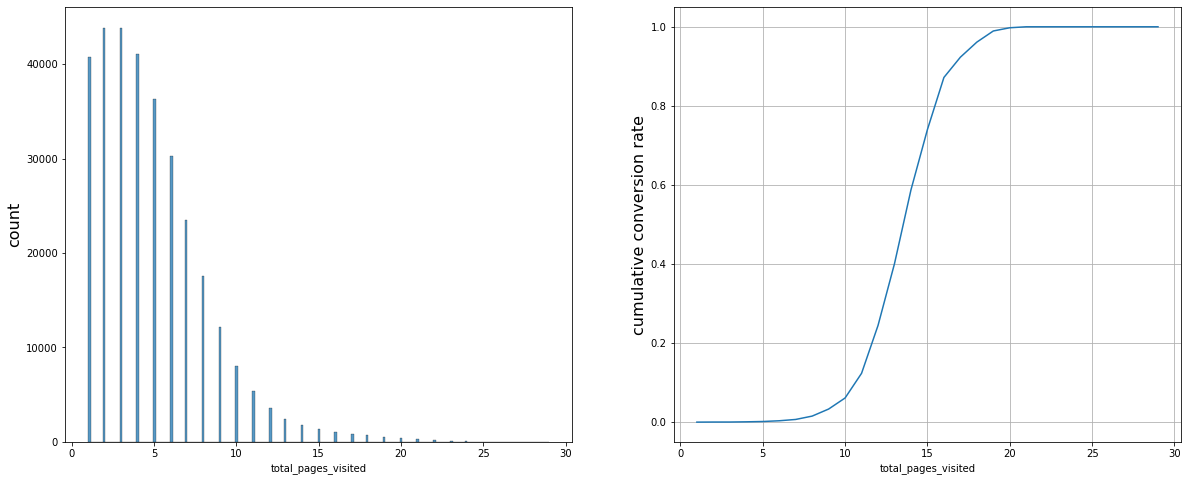

In [14]:
#Total_pages_visited
grouped = data[['total_pages_visited','converted']].groupby('total_pages_visited').mean().reset_index()

fig, axs = plt.subplots(1,2, figsize = (20,8))
sns.histplot(x = data['total_pages_visited'], ax= axs[0])
sns.lineplot(grouped['total_pages_visited'], grouped['converted'], ax = axs[1])
axs[1].set_ylabel('cumulative conversion rate')
axs[1].grid(True)
axs[0].set_ylabel('count',fontsize = 16)
axs[1].set_ylabel('cumulative conversion rate',fontsize = 16)


<b>Obsearvations from the plots </b>
<ul>
    <li>
        <b>Age</b>: <br>The average of customers is around 30 years old. Customers at a young age have a higher conversion rate than older customers.
    </li> 
    <li>
        <b>Total_Page_Visited</b>: <br>Most of customers read less than 5 pages, and the more pages the customer read, the higher the conversion rate is. 
    </li>


In [15]:
'''
fig, ax = plt.subplots(2,1)
fig.tight_layout()
i = 1
for column in columns2:
    plt.subplot(2,1,i)
    sns.kdeplot(x = column, data = data, shade = True, linestyle = '--' )
    i += 1
 '''   

"\nfig, ax = plt.subplots(2,1)\nfig.tight_layout()\ni = 1\nfor column in columns2:\n    plt.subplot(2,1,i)\n    sns.kdeplot(x = column, data = data, shade = True, linestyle = '--' )\n    i += 1\n "

'''The <b>Age</b> and <b>total_pages_visited</b> data are skewed. I will use the log( ) method to remove the skewness'''

In [16]:
'''for column in columns2:
    data[column] = np.log(data[column])
'''

'for column in columns2:\n    data[column] = np.log(data[column])\n'

In [17]:
'''#Re-run the kdeplot to check the skewness
fig, ax = plt.subplots(2,1)
fig.tight_layout()
i = 1
for column in columns2:
    plt.subplot(2,1,i)
    sns.kdeplot(x = column, data = data, shade = True, linestyle = '--' )
    i += 1
'''    

"#Re-run the kdeplot to check the skewness\nfig, ax = plt.subplots(2,1)\nfig.tight_layout()\ni = 1\nfor column in columns2:\n    plt.subplot(2,1,i)\n    sns.kdeplot(x = column, data = data, shade = True, linestyle = '--' )\n    i += 1\n"

In [18]:
#encode the categorical data
data['country'].unique()
data['country'] = data['country'].map({'UK':1,"US":2,"China":3,"Germany":4})

In [19]:
data['source'].unique()
data['source'] = data['source'].map({'Ads':1,"Seo":2,"Direct":3})

In [20]:
data

,country,age,new_user,source,total_pages_visited,converted
0,1,25,1,1,1,0
1,2,23,1,2,5,0
2,2,28,1,2,4,0
3,3,39,1,2,5,0
4,2,30,1,2,6,0
...,...,...,...,...,...,...
316195,2,26,1,1,9,0
316196,2,27,1,3,6,0
316197,3,25,0,1,4,0
316198,2,22,0,2,4,0


# Step#3: Train the Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
X = data.drop(['converted'],axis = 1)
y = data['converted']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)

<AxesSubplot:>

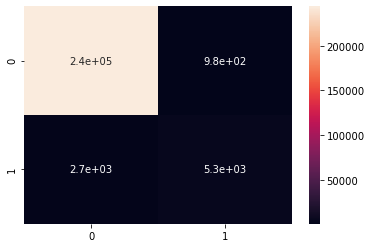

In [25]:
sns.heatmap(confusion_matrix(y_train, y_pred_train),annot = True)

In [26]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    244906
           1       0.84      0.66      0.74      8052

    accuracy                           0.99    252958
   macro avg       0.92      0.83      0.87    252958
weighted avg       0.98      0.99      0.98    252958



<AxesSubplot:>

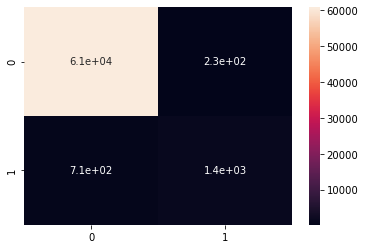

In [27]:
y_pred_test = lr.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot = True)

In [28]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61094
           1       0.86      0.67      0.75      2146

    accuracy                           0.99     63240
   macro avg       0.93      0.83      0.87     63240
weighted avg       0.98      0.99      0.98     63240



In [29]:
#Examine the feature importance 
importance = pd.DataFrame(data = {"coeff":lr.coef_[0]}, index = X_train.columns)
importance["importance"] = np.abs(importance["coeff"])

In [30]:
importance.sort_values(by = "importance",ascending = False)

,coeff,importance
new_user,-1.719363,1.719363
total_pages_visited,0.751036,0.751036
country,-0.476173,0.476173
source,-0.095330,0.095330
age,-0.074043,0.074043


# Step#4: Improveing the model

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
rf = RandomForestClassifier(n_estimators = 150, criterion = 'entropy')

In [33]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

<AxesSubplot:>

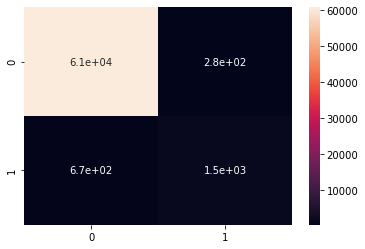

In [34]:
y_pred_test_rf= rf.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred_test_rf), annot = True)

In [35]:
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61094
           1       0.84      0.69      0.75      2146

    accuracy                           0.98     63240
   macro avg       0.91      0.84      0.87     63240
weighted avg       0.98      0.98      0.98     63240



In [36]:
rf_importance = pd.DataFrame(data = {"importance":rf.feature_importances_}, index = X_train.columns.values)

In [37]:
rf_importance.sort_values('importance',ascending = False)

,importance
total_pages_visited,0.770872
age,0.103031
new_user,0.060762
country,0.049609
source,0.015725


<b>Conclusion:</b>
<ul>
    <li>1. Total pages visited are highly relative with the conversion rate. If someone visited many pages but did not make a purchase decision, I would send he/she a target email with offers or send he/she a reminder.
    </li>
    <li>2. The website performs very well among the teen groups. The marketing team can find some channels that can reach more younger people. 
    </li>
    <li>3. The product team may need to check the UX to figure out why people around 30 years old, which is the average age of our customers, have a lower conversion rate.
    </li>
    <li>4. the conversion rate of existing customers is higher than the one of new customers. Email campaign with special offers for existing customers may help for sales.
    </li>5. We have least customers from Germany, but the conversion rate is the highest. Marketing team may need to find more channels to reach and attract more German customers. On the other hand, we have a lot customers from China, but the conversion rate is very low, product team may need to figure out the possible reasons that cause this issue. The reason may include: Translation, Local Culture, Payment, Shipment. 
    <li>Cusomer source is not necessarily relevant with the conversion rate
    
